In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import seaborn as sns
import tqdm.autonotebook as tqdman

import utils

/var/folders/2n/v3g75q4d3636klrs2jxq81zc0000gp/T/ipykernel_49382/9352543.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
ID = "sb_noSRM_inclu"

<IPython.core.display.Javascript object>

In [61]:
INPUT_FILE = Path(utils.DATA_DIR / "interim" / "delta_rf" / f"{ID}_delta-erf_meta.csv")

<IPython.core.display.Javascript object>

In [62]:
pdf = pd.read_csv(INPUT_FILE)

<IPython.core.display.Javascript object>

In [63]:
SRM_depl = pdf[
    (pdf["year_return_back_below_15_temp"] < 2501)
    & (pdf["year_return_back_below_15_temp"] > 2029)
]

<IPython.core.display.Javascript object>

Remove pathways that don't hit 1.5°C before 2500

In [6]:
pdf.drop("run_id", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [7]:
pdf.dropna(inplace=True)

<IPython.core.display.Javascript object>

In [8]:
pdf.reset_index(drop=True)

,2100_warming,SRM_years,TCRE,average_cdr_between_peak_and_15_temp,climate_model,ensemble_member,max_CDR,model,ms,net_CDR_at_15_temp,net_emissions,peak_warming,region,scenario,total_CDR,unit,variable,year_return_back_below_15_temp
0,2.489039,327,1.950013,13756.483088,MAGICCv7.5.3,0,-13683.159952,AIM/CGE 2.1,AIM/CGE 2.1CD-LINKS_INDC2030i_1600,-3.410412e+06,1.512856e+06,2.627932,World,CD-LINKS_INDC2030i_1600,-4.910419e+06,W/m^2,delta_rf,2382.0
1,2.147834,309,1.950013,20914.014393,MAGICCv7.5.3,0,-8395.374329,AIM/CGE 2.1,AIM/CGE 2.1CD-LINKS_NDC2030i_1000,-5.464530e+06,1.007898e+06,2.156935,World,CD-LINKS_NDC2030i_1000,-3.531033e+06,W/m^2,delta_rf,2364.0
2,1.980358,169,1.950013,5641.134093,MAGICCv7.5.3,0,-10788.933173,AIM/CGE 2.2,AIM/CGE 2.2EN_INDCi2030_1000f,-8.405290e+05,1.363703e+06,2.081066,World,EN_INDCi2030_1000f,-4.445832e+06,W/m^2,delta_rf,2213.0
3,2.089920,217,1.950013,2591.499600,MAGICCv7.5.3,0,-13784.653839,AIM/CGE 2.2,AIM/CGE 2.2EN_INDCi2030_1200,-3.825478e+05,1.397728e+06,2.094740,World,EN_INDCi2030_1200,-4.848499e+06,W/m^2,delta_rf,2260.0
4,2.085738,180,1.950013,3310.714936,MAGICCv7.5.3,0,-13334.209558,AIM/CGE 2.2,AIM/CGE 2.2EN_INDCi2030_1200f,-5.065394e+05,1.521125e+06,2.159301,World,EN_INDCi2030_1200f,-5.221348e+06,W/m^2,delta_rf,2224.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166205,1.918596,276,1.771202,9479.175227,MAGICCv7.5.3,599,-19137.344319,WITCH 5.0,WITCH 5.0EN_INDCi2030_900_NDCp,-2.241141e+06,1.025975e+06,1.918596,World,EN_INDCi2030_900_NDCp,-3.768033e+06,W/m^2,delta_rf,2332.0
166206,1.925430,101,1.771202,16025.067471,MAGICCv7.5.3,599,-19370.291148,WITCH 5.0,WITCH 5.0EN_INDCi2030_900f_NDCp,-1.085533e+06,1.142354e+06,1.969815,World,EN_INDCi2030_900f_NDCp,-8.029435e+06,W/m^2,delta_rf,2147.0
166207,1.900094,140,1.771202,8979.444260,MAGICCv7.5.3,599,-6239.176720,WITCH-GLOBIOM 4.4,WITCH-GLOBIOM 4.4CD-LINKS_INDC2030i_1600,-1.122431e+06,1.506608e+06,1.915832,World,CD-LINKS_INDC2030i_1600,-3.082640e+06,W/m^2,delta_rf,2208.0
166208,3.416044,374,1.771202,8138.462457,MAGICCv7.5.3,599,-29909.038348,WITCH-GLOBIOM 4.4,WITCH-GLOBIOM 4.4CD-LINKS_INDCi,-2.229939e+06,7.791385e+06,4.629579,World,CD-LINKS_INDCi,-9.484346e+06,W/m^2,delta_rf,2464.0


<IPython.core.display.Javascript object>

(array([6.00000e+00, 3.00000e+01, 1.41000e+02, 2.52000e+02, 3.69000e+02,
        4.47000e+02, 6.69000e+02, 9.33000e+02, 1.47000e+03, 2.02800e+03,
        3.11400e+03, 4.03800e+03, 5.91000e+03, 8.57700e+03, 1.26240e+04,
        1.87260e+04, 3.00630e+04, 5.68050e+04, 1.23324e+05, 2.29104e+05]),
 array([-52.69038594, -50.05586664, -47.42134734, -44.78682804,
        -42.15230875, -39.51778945, -36.88327015, -34.24875086,
        -31.61423156, -28.97971226, -26.34519297, -23.71067367,
        -21.07615437, -18.44163508, -15.80711578, -13.17259648,
        -10.53807719,  -7.90355789,  -5.26903859,  -2.6345193 ,
          0.        ]),
 <BarContainer object of 20 artists>)

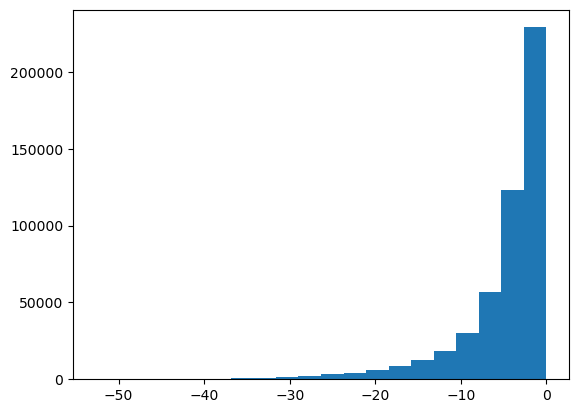

<IPython.core.display.Javascript object>

In [75]:
plt.hist(x=SRM_depl["average_cdr_between_peak_and_15_temp_PgC"], bins=20)


In [65]:
pdf = SRM_depl

<IPython.core.display.Javascript object>

In [66]:
## turn MtCo2 to PgC = 3.67 GtCo2
pdf["average_cdr_between_peak_and_15_temp_PgC"] = (
    pdf["net_CDR_at_15_temp"] * 3.67 * 1e-6
)

<IPython.core.display.Javascript object>

In [67]:
## calculate estimation
pdf["SRM_guesstimate"] = (pdf["peak_warming"] - 1.5) / (
    pdf["TCRE"] * pdf["average_cdr_between_peak_and_15_temp_PgC"]
)

<IPython.core.display.Javascript object>

(-400.0, 0.0)

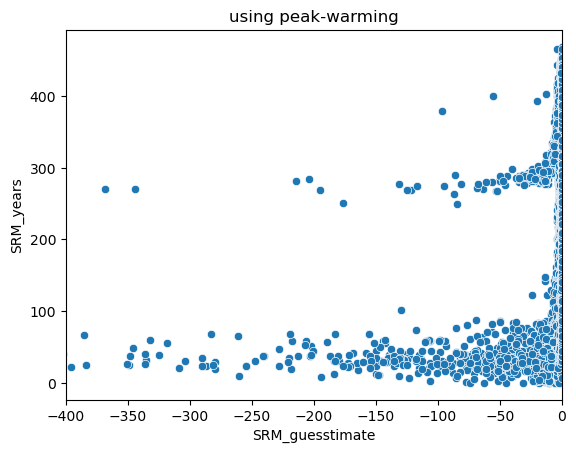

<IPython.core.display.Javascript object>

In [68]:
sns.scatterplot(data=pdf, x="SRM_guesstimate", y="SRM_years")
plt.title("using peak-warming")
plt.xlim(-400, 0)

Text(0, 0.5, 'TCRE * N_ave')

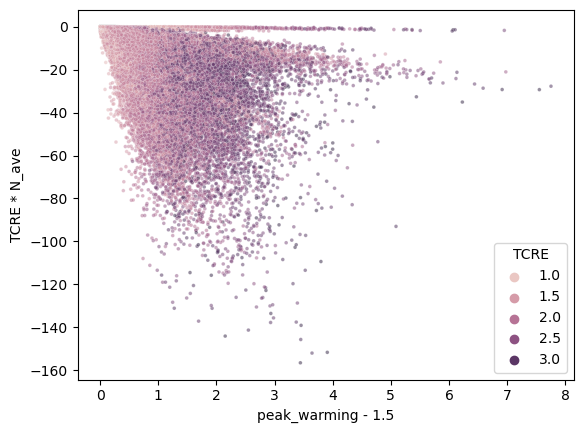

<IPython.core.display.Javascript object>

In [69]:
pdf["x"] = pdf["peak_warming"] - 1.5
pdf["y"] = pdf["TCRE"] * pdf["average_cdr_between_peak_and_15_temp_PgC"]
sns.scatterplot(data=pdf, x="x", y="y", s=7, alpha=0.5, hue="TCRE")
plt.xlabel("peak_warming - 1.5")
plt.ylabel("TCRE * N_ave")

Text(0.5, 1.0, 'test')

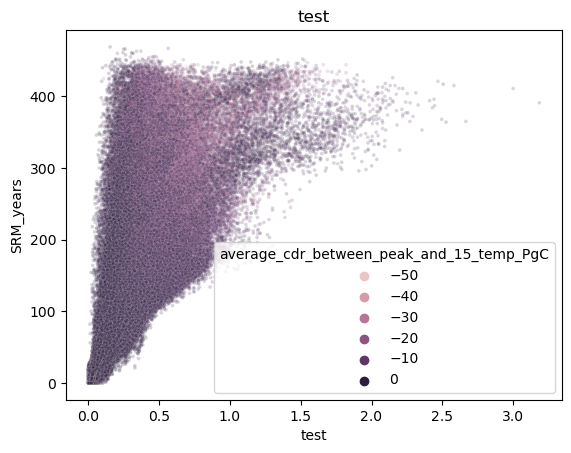

<IPython.core.display.Javascript object>

In [73]:
pdf["test"] = (pdf["peak_warming"] - 1.5) / pdf["TCRE"]
sns.scatterplot(
    data=pdf,
    x="test",
    y="SRM_years",
    hue="average_cdr_between_peak_and_15_temp_PgC",
    s=7,
    alpha=0.2,
)
plt.title("test")

In [20]:
len(pdf["SRM_guesstimate"].drop_duplicates())

160719

<IPython.core.display.Javascript object>